<a href="https://colab.research.google.com/github/ShibuGitB/CodSoft/blob/main/Task_2_CodSoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing Necessary Packages***

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

***Dataset***

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Task 2 CodSoft/dataset.csv",nrows=100000)
dataset

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2019-02-28 15:36:49,2475085306462014,"fraud_O'Reilly, Mohr and Purdy",home,95.14,John,Miller,M,153 Mccullough Springs Apt. 857,...,44.2378,-95.2739,1507,Land/geomatics surveyor,1993-10-12,085e8f89f41378f4bd21ed8a59065fee,1330443409,44.718105,-95.843397,0
99996,99996,2019-02-28 15:37:27,4005676619255478,fraud_Kub PLC,personal_care,8.75,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,9988dd4de1bb2182a7b3ec5f1ede1e34,1330443447,29.931844,-90.610715,0
99997,99997,2019-02-28 15:37:34,3519232971341141,fraud_Schuppe-Schuppe,food_dining,34.20,Michael,Jones,M,754 Smith Isle,...,40.4731,-80.9596,2208,Mental health nurse,1961-09-10,70151fb544afe365dc163889d67f5be6,1330443454,41.076153,-80.506107,0
99998,99998,2019-02-28 15:38:11,4040099974063068803,fraud_Rippin-VonRueden,health_fitness,73.11,Jeffrey,Lewis,M,24255 Bryan Square,...,48.3396,-102.2400,229,Administrator,1983-03-20,bc2adb0fad8f733cdc21ebefcc79ddf3,1330443491,48.535070,-102.524262,0


***Top 5 categorys with the number of money transactions***

<BarContainer object of 5 artists>

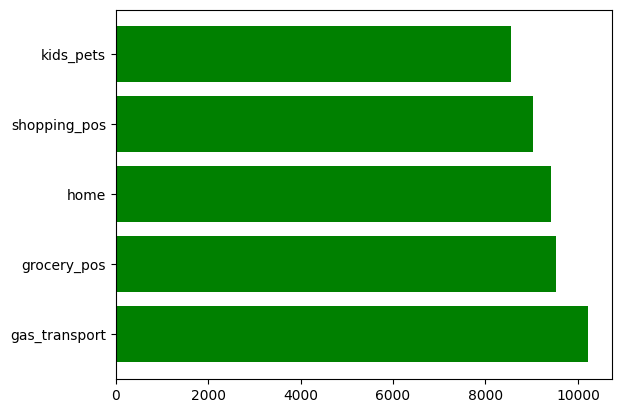

In [ ]:
x=["gas_transport","grocery_pos","home","shopping_pos","kids_pets"]
y=[10221,9533,9417,9021,8558]

plt.barh(x,y,color="green")

***Male & Female count about the transaction***

<Axes: xlabel='gender', ylabel='count'>

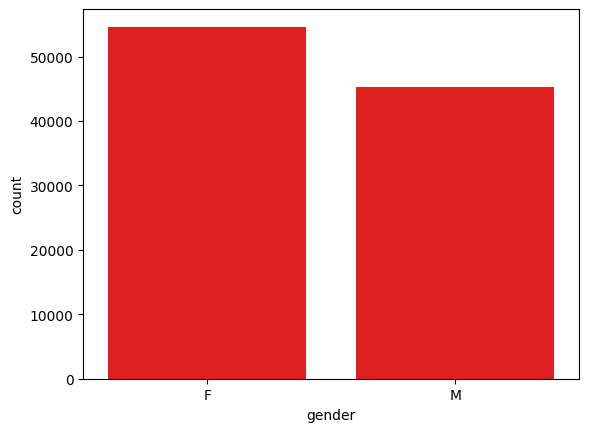

In [ ]:
sns.countplot(x="gender",data=dataset,color="r")

***Top 5 citys with the number of transactions***

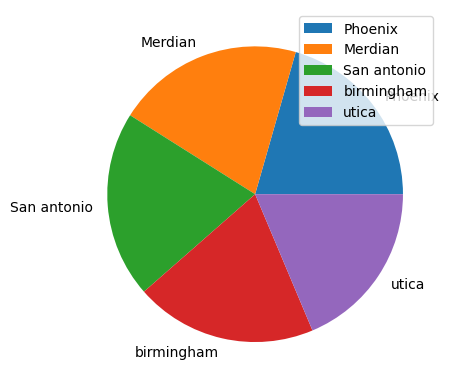

In [ ]:
x=["Phoenix","Merdian","San antonio","birmingham","utica"]
y=[420,418,417,406,381]

plt.pie(x=y,labels=x)
plt.legend()

***Top 5 states with the number of transactions***

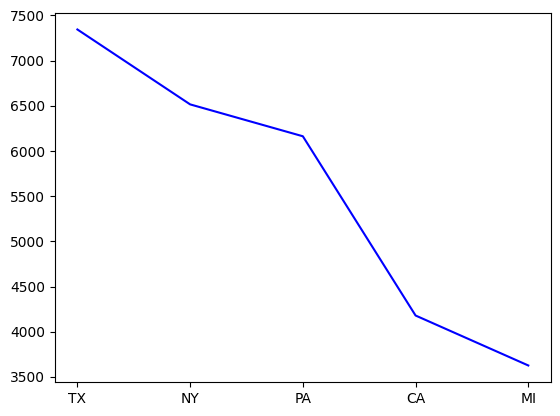

In [ ]:
x=["TX","NY","PA","CA","MI"]
y=[7345,6516,6163,4179,3626]

plt.plot(x,y,color="b")

***Top 5 Job peoples done the transaction***

<BarContainer object of 5 artists>

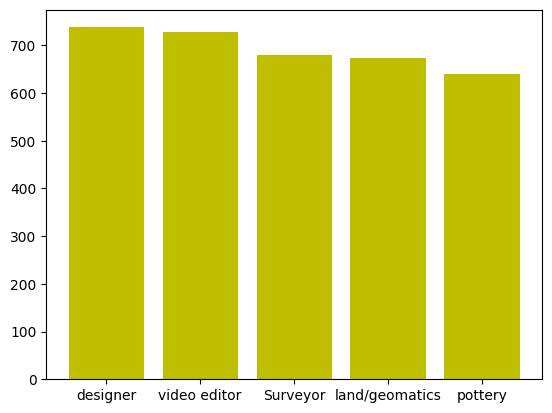

In [ ]:
x=["designer","video editor","Surveyor","land/geomatics","pottery"]
y=[738,729,679,673,641]

plt.bar(x,y,color="y")

***Removing unwanted columns***

In [ ]:
columns=["Unnamed: 0","trans_date_trans_time","merchant","category","first","last","gender","street","city","state","job","dob"]

for i in columns :

  dataset.drop([i],axis=1,inplace=True)

In [ ]:
dataset

,cc_num,amt,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,2475085306462014,95.14,56152,44.2378,-95.2739,1507,085e8f89f41378f4bd21ed8a59065fee,1330443409,44.718105,-95.843397,0
99996,4005676619255478,8.75,70726,30.4590,-90.9027,71335,9988dd4de1bb2182a7b3ec5f1ede1e34,1330443447,29.931844,-90.610715,0
99997,3519232971341141,34.20,43903,40.4731,-80.9596,2208,70151fb544afe365dc163889d67f5be6,1330443454,41.076153,-80.506107,0
99998,4040099974063068803,73.11,58769,48.3396,-102.2400,229,bc2adb0fad8f733cdc21ebefcc79ddf3,1330443491,48.535070,-102.524262,0


In [ ]:
dataset.isna().sum()

cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [ ]:
dataset.dtypes

cc_num          int64
amt           float64
zip             int64
lat           float64
long          float64
city_pop        int64
trans_num      object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

***Converting string columns to Numerical***

In [ ]:
encoder=LabelEncoder()
encoder.fit(dataset["trans_num"])
dataset["trans_num"]=encoder.transform(dataset["trans_num"])

In [ ]:
dataset

,cc_num,amt,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,4328,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,12254,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,63171,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,41919,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,64118,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,2475085306462014,95.14,56152,44.2378,-95.2739,1507,3243,1330443409,44.718105,-95.843397,0
99996,4005676619255478,8.75,70726,30.4590,-90.9027,71335,59970,1330443447,29.931844,-90.610715,0
99997,3519232971341141,34.20,43903,40.4731,-80.9596,2208,43661,1330443454,41.076153,-80.506107,0
99998,4040099974063068803,73.11,58769,48.3396,-102.2400,229,73509,1330443491,48.535070,-102.524262,0


***Balancing imbalanced Dataset by Over Sampling***

In [ ]:
dataset["is_fraud"].value_counts()

is_fraud
0    99010
1      990
Name: count, dtype: int64

In [ ]:
input=dataset.iloc[:,:-1]
output=dataset.iloc[:,-1]

In [ ]:
sampler=SMOTE()
input,output=sampler.fit_resample(input,output)

In [ ]:
output.value_counts()

is_fraud
0    99010
1    99010
Name: count, dtype: int64

***Scaling input***

In [ ]:
scaler=MinMaxScaler()
scaler.fit(input)
input=scaler.transform(input)

***Taking input & output for Training & Testing***

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input,output,test_size=0.3,random_state=1)

***Creating models by all algorithms & checking their accuracys***

In [ ]:
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred1))

0.9807931858734807


In [ ]:
model2=SVC(kernel="linear")
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred2))

0.8802982863683803


In [ ]:
model3=GaussianNB()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred3))

0.8502171497828502


In [ ]:
model4=DecisionTreeClassifier(criterion="entropy")
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred4))

0.9893950106049894


In [ ]:
model5=RandomForestClassifier(n_estimators=200,criterion="entropy")
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred5))

0.996936336396997


In [ ]:
model6=AdaBoostClassifier()
model6.fit(x_train,y_train)
y_pred6=model6.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred6))

0.8980911019088981


***Choosed a better model from XGB Classifiers with almost accuracy of 99% and made the prediction***

In [ ]:
model7=XGBClassifier()
model7.fit(x_train,y_train)
y_pred7=model7.predict(x_test)

In [ ]:
print (accuracy_score(y_test,y_pred7))

0.9978958354374979


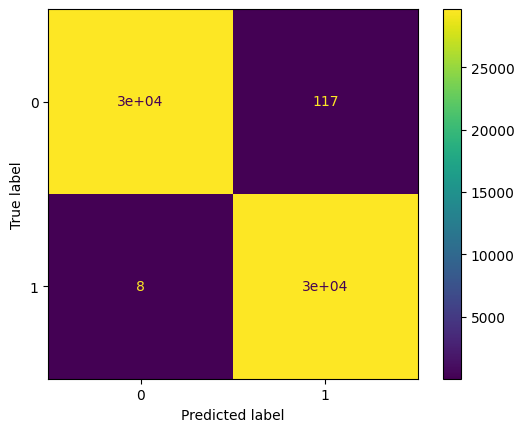

In [ ]:
print (ConfusionMatrixDisplay.from_predictions(y_test,y_pred7))

In [ ]:
print (classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29715
           1       1.00      1.00      1.00     29691

    accuracy                           1.00     59406
   macro avg       1.00      1.00      1.00     59406
weighted avg       1.00      1.00      1.00     59406



In [ ]:
import warnings
warnings.filterwarnings("ignore")

***Prediction by a sample input***

In [ ]:
predictions=model7.predict(scaler.transform([[2703186189652095,4.97,28654,36.0788,-81.1781,3495,4328,1325376018,36.011293,-82.048315]]))

if predictions==0 :

  print ("the Person did the transaction & cc is not fraud")

else :

  print ("the Person did the transaction & the cc is Fraud")

the Person did the transaction & cc is not fraud
